In [1]:
# imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10

import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup

In [10]:
top = pd.read_csv('data/winners2021.csv')
top.drop(['Unnamed: 0'], axis=1, inplace=True)
df = pd.read_csv('data/golf_stats.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
names = top["NAME"].to_list()
names.append('Tiger Woods')
names

['Justin Thomas',
 'Bryson DeChambeau',
 'Russell Henley',
 'Joaquin Niemann',
 'Xander Schauffele',
 'Webb Simpson',
 'Viktor Hovland',
 'Jon Rahm',
 'Dustin Johnson',
 'Cameron Tringale',
 'Tiger Woods']

In [12]:
Justin_Thomas = df.loc[df['NAME']=='Justin Thomas']
Bryson_DeChambeau = df.loc[df['NAME']=='Bryson DeChambeau']
Russell_Henley = df.loc[df['NAME']=='Russell Henley']
Joaquin_Niemann = df.loc[df['NAME']=='Joaquin Niemann']
Webb_Simpson = df.loc[df['NAME']=='Webb Simpson']
Xander_Schauffele = df.loc[df['NAME']=='Xander Schauffele']
Jon_Rahm = df.loc[df['NAME']=='Jon Rahm']
Cameron_Tringale = df.loc[df['NAME']=='Cameron Tringale']
Will_Zalatoris = df.loc[df['NAME']=='Will Zalatoris']
Cameron_Smith = df.loc[df['NAME']=='Cameron Smith']
Corey_Conners = df.loc[df['NAME']=='Corey Conners']
Tony_Finau = df.loc[df['NAME']=='Tony Finau']
Louis_Oosthuizen = df.loc[df['NAME']=='Louis Oosthuizen']
Viktor_Hovland = df.loc[df['NAME']=='Viktor Hovland']
Daniel_Berger = df.loc[df['NAME']=='Daniel Berger']
Brooks_Koepka= df.loc[df['NAME']=='Brooks Koepka']
Brian_Harman = df.loc[df['NAME']=='Brian Harman']
Emiliano_Grillo = df.loc[df['NAME']=='Emiliano Grillo']
Tiger_Woods = df.loc[df['NAME']=='Tiger Woods']

# Top 19, 2021 FedEx Cup + Tiger woods (injured)

In [13]:
def analysis(name):
    
    plt.plot( 'YEAR', 'SG_OTT', data= name, markerfacecolor='blue', linewidth=2)
    plt.plot( 'YEAR', 'SG_APR', data= name, color='red', linewidth=2)
    plt.plot( 'YEAR', 'SG_ARG', data= name, color='olive', linewidth=2)

    plt.title("PLAYER'S EVOLUTION")
    plt.xlabel('YEAR')
    plt.ylabel('STROKES GAINED')

    # show legend
    plt.legend()

    # show graph
    plt.show()
    
    
    fig, axes = plt.subplots(ncols = 4, nrows = 1, figsize = (20,20))
    driving_distance = name.groupby ('YEAR')['DRIVING_DISTANCE'].median().reset_index()
    axes[0].bar(name['YEAR'],name['DRIVING_DISTANCE'])
    axes[0].set_title('DRIVING DISTANCE EVOLUTION')
    axes[0].set_yticks(range(270,330,5))

    SG_putting = name.groupby('YEAR')['SG_PUTTING'].median().reset_index()
    axes[1].bar(name['YEAR'], name['SG_PUTTING'])
    axes[1].set_title('SG:PUTTING EVOLUTION')
    axes[2].set_yticks(range(-30,50,2))

    total_SG = name.groupby('YEAR')['TOTAL_SG'].median().reset_index()
    axes[2].bar(name['YEAR'], name['TOTAL_SG'])
    axes[2].set_title('SG:TEE to GREEN EVOLUTION')
    axes[2].set_yticks(range(0,3))
  

    top_10 = name.groupby('YEAR')['TOP_10S'].median().reset_index()
    axes[3].bar(name['YEAR'], name['TOP_10S'])
    axes[3].set_title('TOP 10s')
    axes[3].set_yticks(range(0,15,1))
   
    
    # Looking at the changes in statistics over time 
    f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
    distribution = df.loc[:,(df.columns!='NAME') & (df.columns!='WINS')].columns
    distribution = distribution[distribution != 'YEAR']

    print(distribution)
    rows = 0
    cols = 0
    for i, column in enumerate(distribution):
        p = sns.boxplot(x = 'YEAR', y = column, data=name, ax=ax[rows][cols], showfliers=False)
        p.set_ylabel(column,fontsize=20)
        p.set_xlabel('YEAR',fontsize=20)
        cols += 1
        if cols == 3:
            cols = 0
            rows += 1

    return

# Get a visual analysis of any of the players listed above, type: SG_analysis(player_name)

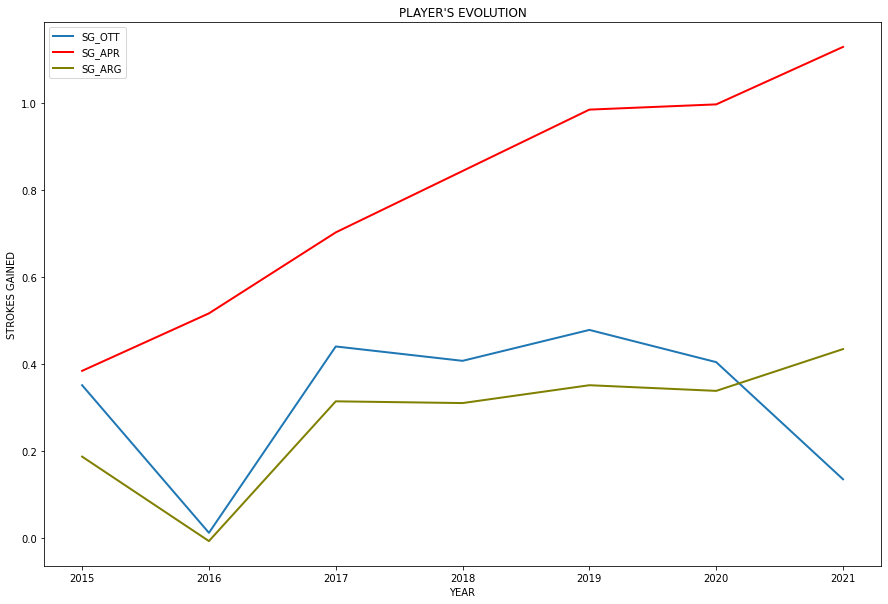

Index(['ADJUSTMENT', 'HOLES', 'RELATIVE_PAR', 'SG_PUTTING', 'SG_OTT', 'SG_APR',
       'SG_ARG', 'TOP_10S', '1ST', '2ND', '3RD', 'SCORE_AVERAGE',
       'DRIVING_DISTANCE', 'DRIVING_ACCURACY', 'DRIVING_USAGE',
       'GREENS_IN_REGULATION', 'TOTAL_SG'],
      dtype='object')


IndexError: index 5 is out of bounds for axis 0 with size 5

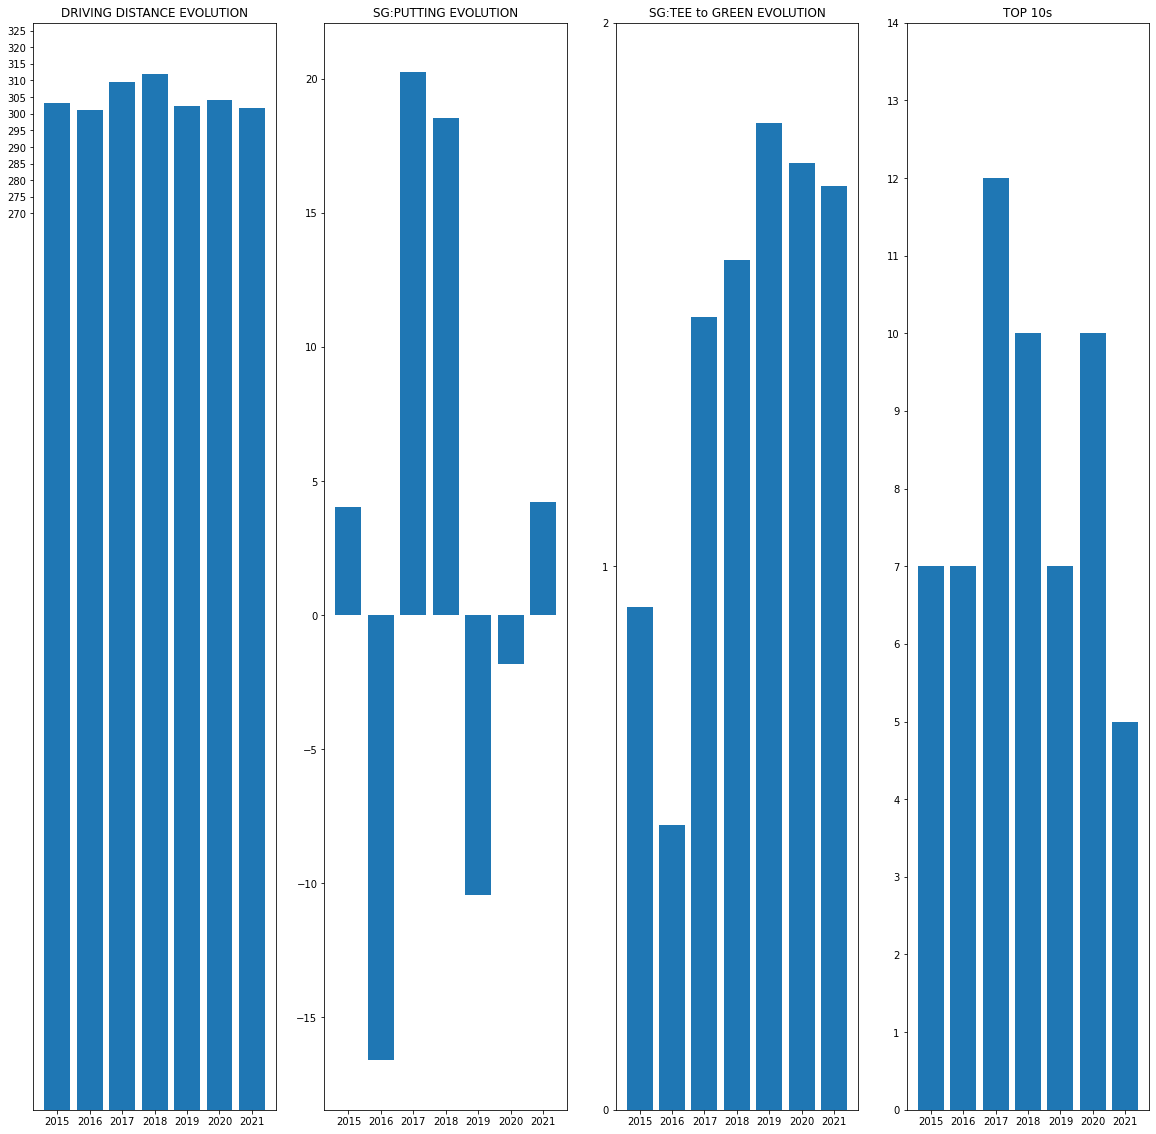

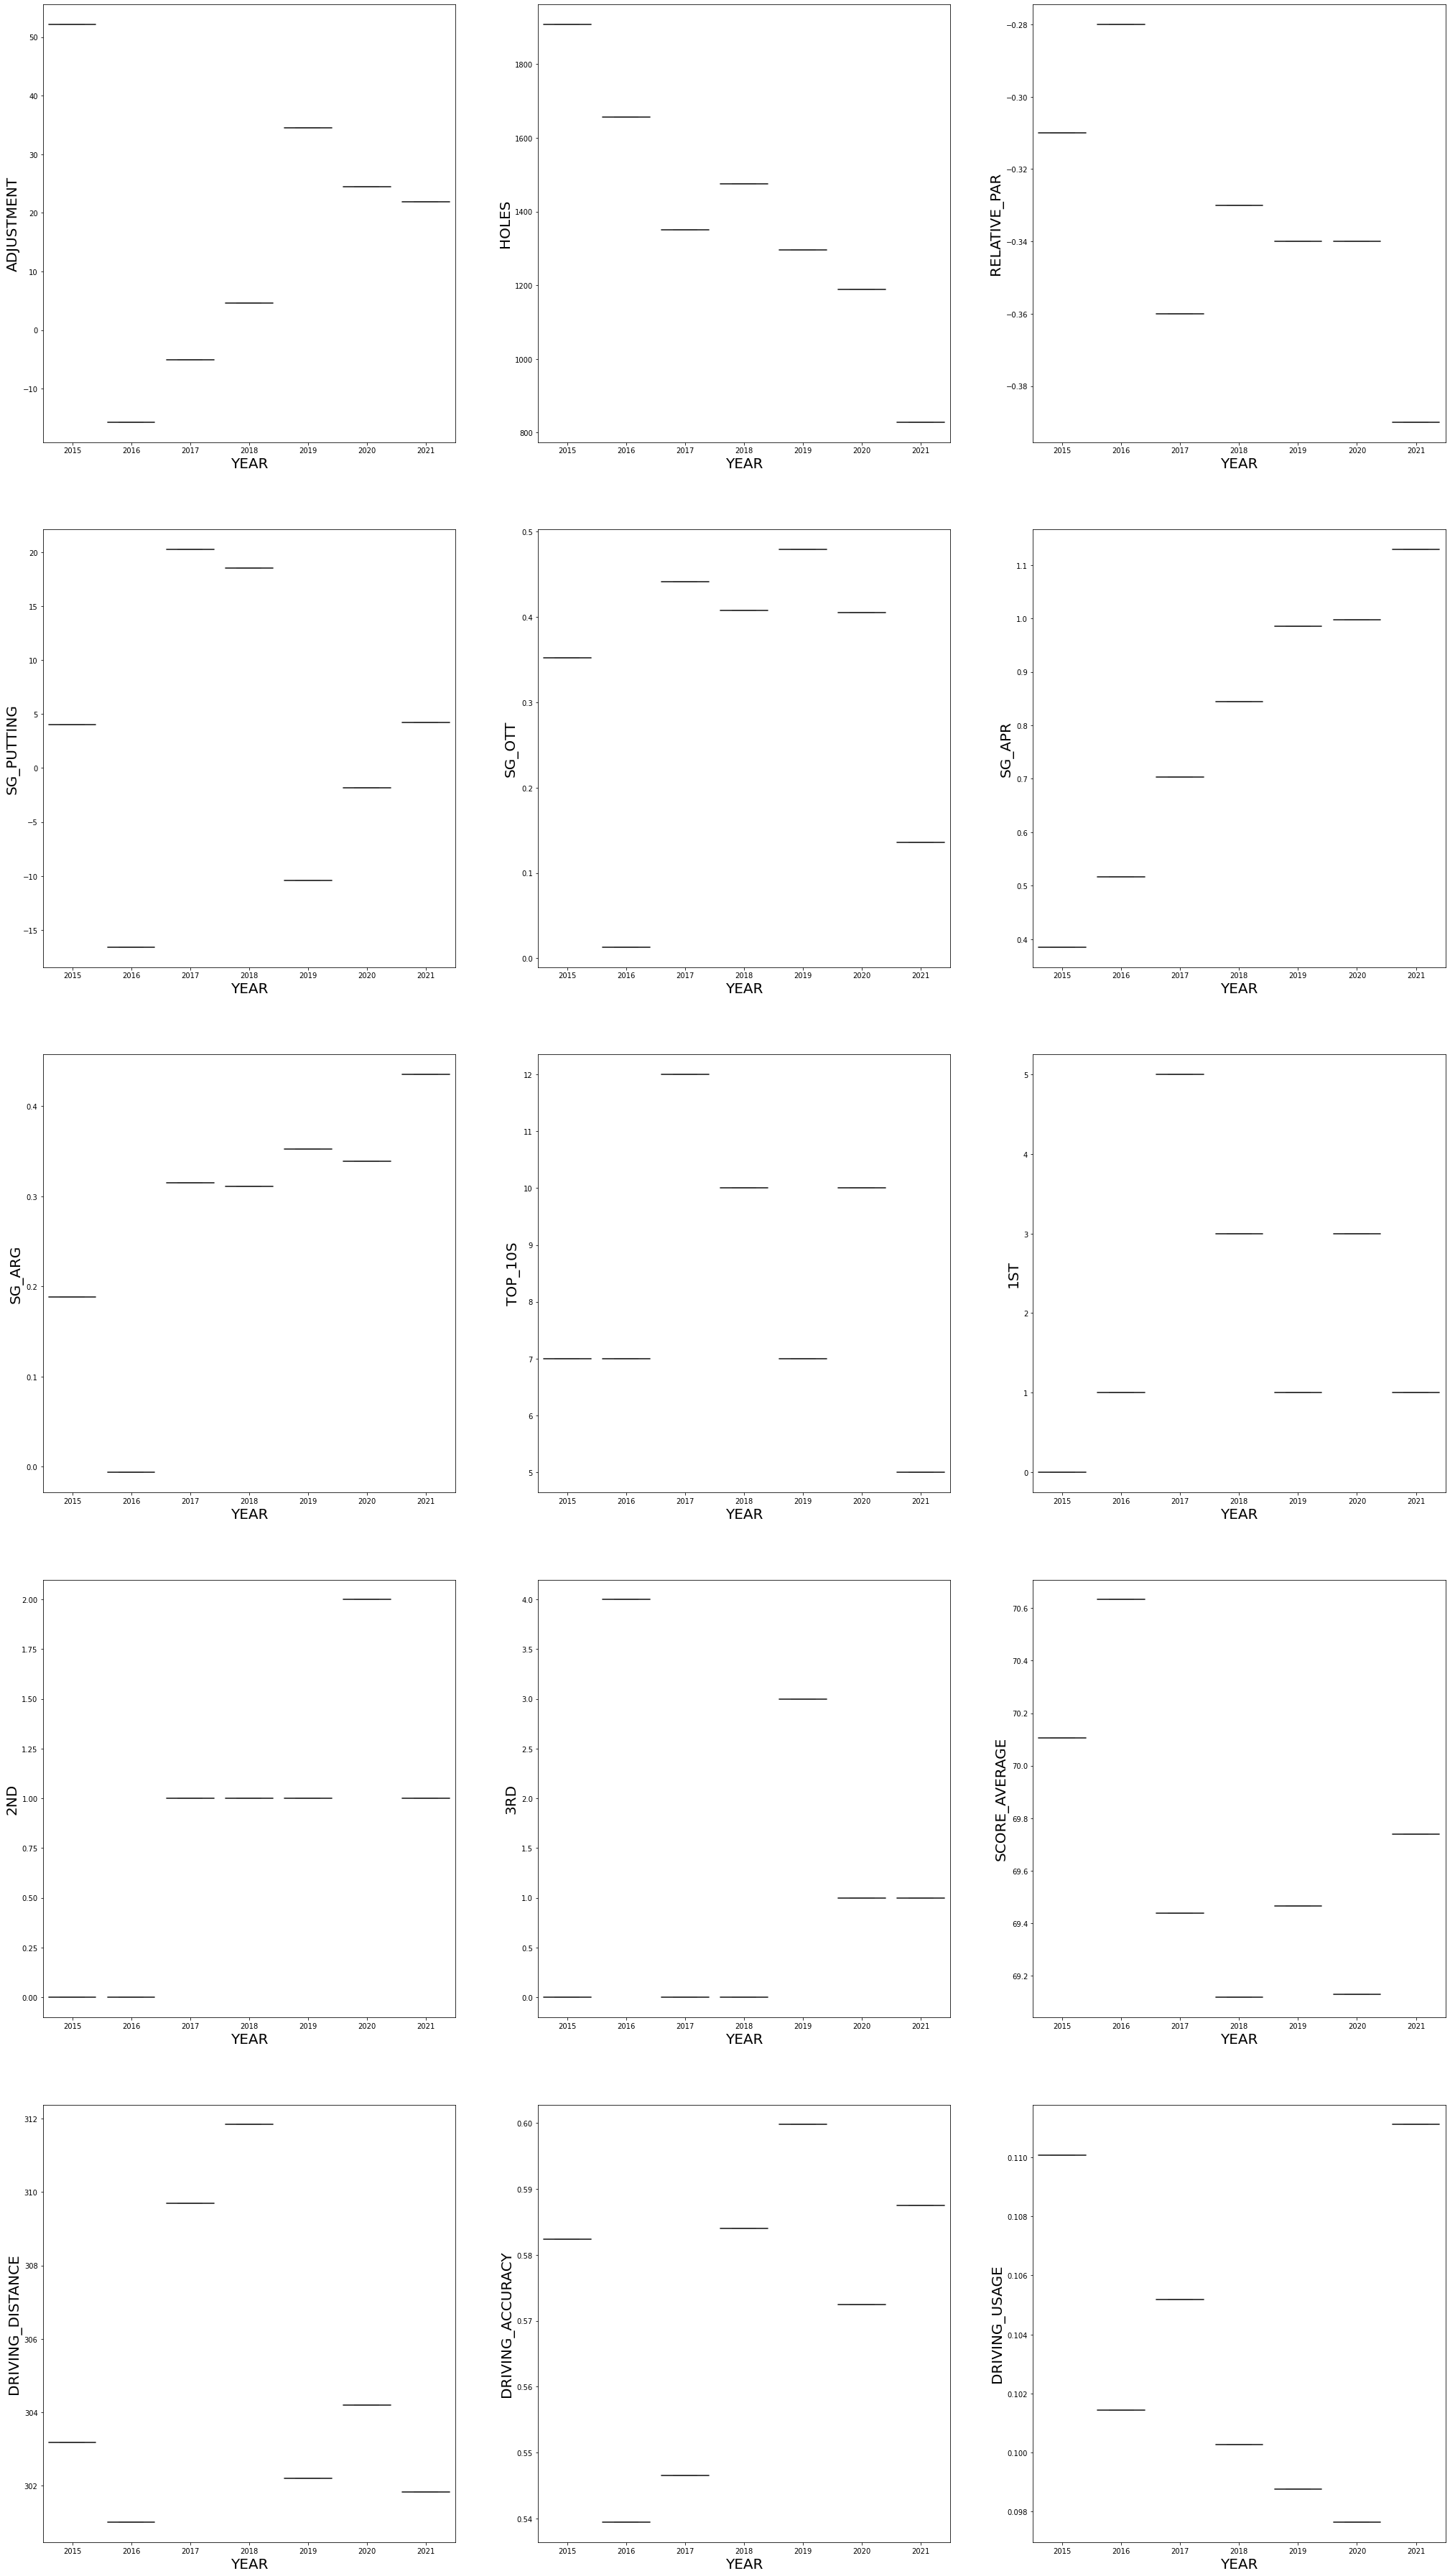

In [14]:
analysis(Justin_Thomas)